<a href="https://colab.research.google.com/github/rajagopalmotivate/hack2023/blob/main/acid_attack_skin_refresh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Try it out for ELC Hack-a-thon 2023.



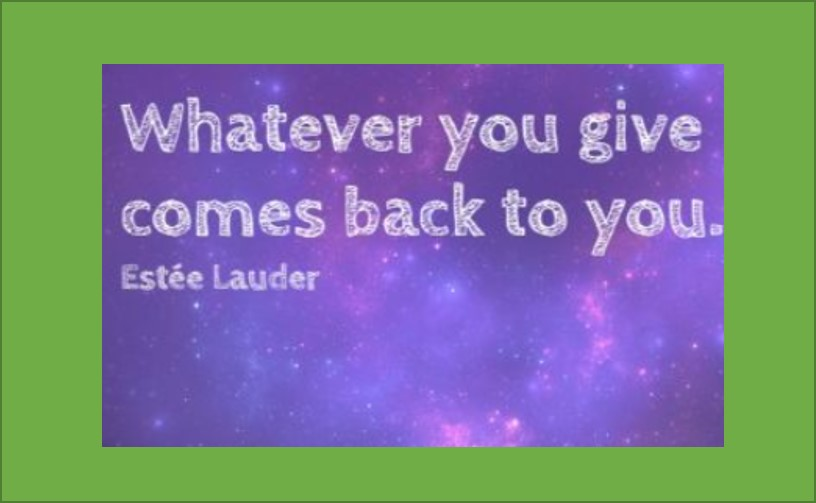

# This is based GFPGAN Inference   (Paper  )


## GFPGAN - Towards Real-World Blind Face Restoration with Generative Facial Prior

GFPGAN is a blind face restoration algorithm towards real-world face images. <br>
It leverages the generative face prior in a pre-trained GAN (*e.g.*, StyleGAN2) to restore realistic faces while precerving fidelity. <br>

Based on GFPGAN paper : https://github.com/TencentARC/GFPGAN/releases

 

# Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.


In [ ]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# Set BASICSR_EXT=True to compile the cuda extensions in the BasicSR - It may take several minutes to compile, please be patient.
!BASICSR_EXT=True pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
!wget https://github.com/TencentARC/GFPGAN/releases/download/v0.1.0/GFPGANv1.pth -P experiments/pretrained_models

/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 523, done.
remote: Total 523 (delta 0), reused 0 (delta 0), pack-reused 523
Receiving objects: 100% (523/523), 5.39 MiB | 20.16 MiB/s, done.
Resolving deltas: 100% (264/264), done.
/content/GFPGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.9/305.9 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 74.7 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-cp39-cp39-linux_x86_64.whl size=10178081 sha256=b5ec953826d07436dc08abb035ba421cb06ecbe9403182c60174589904019926
  Stored in directory: /root/.cach

# Inference cropped face images

We first look at the cropped low-quality faces.<br>
Some examples are in the <inputs/cropped_faces> folder.

In [ ]:
# visulize the cropped low-quality faces
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img


In [ ]:
# Now we use the GFPGAN to restore the above low-quality images
# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo
!rm -rf results
!python inference_gfpgan.py -i inputs/cropped_faces -o results -v 1 -s 2 --aligned

# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...
# 
#  -h                   show this help
#  -i input             Input image or folder. Default: inputs/whole_imgs
#  -o output            Output folder. Default: results
#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3
#  -s upscale           The final upsampling scale of the image. Default: 2
#  -bg_upsampler        background upsampler. Default: realesrgan
#  -bg_tile             Tile size for background sampler, 0 for no tile during testing. Default: 400
#  -suffix              Suffix of the restored faces
#  -only_center_face    Only restore the center face
#  -aligned             Input are aligned faces
#  -ext                 Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto


Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.1/RealESRGAN_x2plus.pth" to /usr/local/lib/python3.9/dist-packages/weights/RealESRGAN_x2plus.pth

100% 64.0M/64.0M [00:00<00:00, 211MB/s]
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /content/GFPGAN/gfpgan/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:01<00:00, 106MB/s]
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.2

In [ ]:
# Now, let us to look at the reuslts! :-)
# The results are in the <resutls> folder
!ls results

cmp  cropped_faces  restored_faces


In [ ]:
# Visualize the results
# The left are the inputs images; the right are the results of GFPGAN
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img


We can see that:
Not only the **facial details**, but also the **colors** are enhanced by the GFPGAN model.

# Inference whole images

We use `facexlib` to detect and crop face images on a whole photo, and then restore the face images by GFPGAN.

Note that currently, it does not well support to paste the faces back into the original photo, as the restored faces are incosistent with the original photos in terms of details and colors.<br>
You can find the improved version in this [Colab Demo](https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo).

<br>

Now, we will enhance the faces in the following two photos.



In [ ]:
# Visualize input images to be resotred
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img


In [ ]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo
!rm -rf results
!python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1 -s 2 --bg_upsampler realesrgan

# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...
# 
#  -h                   show this help
#  -i input             Input image or folder. Default: inputs/whole_imgs
#  -o output            Output folder. Default: results
#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3
#  -s upscale           The final upsampling scale of the image. Default: 2
#  -bg_upsampler        background upsampler. Default: realesrgan
#  -bg_tile             Tile size for background sampler, 0 for no tile during testing. Default: 400
#  -suffix              Suffix of the restored faces
#  -only_center_face    Only restore the center face
#  -aligned             Input are aligned faces
#  -ext                 Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Processing 00.jpg ...
	Tile 1/20
	Tile 2/20
	Tile 3/20
	Tile 4/20
	Tile 5/20
	Tile 6/20
	Tile 7/20
	Tile 8/20
	Tile 9/20
	Tile 10/20
	Tile 11/20
	Tile 12/20
	Tile 13/20
	Tile 14/20
	Tile 15/20
	Tile 16/20
	Tile 17/20
	Tile 18/20
	Tile 19/20
	Tile 20/20
Processing 10045.png ...
	Tile 1/6
	Tile 2/6
	Tile 3/6
	Tile 4/6
	Tile 5/6
	Tile 6/6
Processing Blake_Lively.jpg ...
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Results are in the [results] folder.


In [ ]:
# Visualize the results
# The left are the inputs images; the right are the results of GFPGAN
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img



In [ ]:
# Visualize the whole images 
# However, due to the color and detail inconsistency, the results may look unnatural. 

import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img



# Try it on uploaded images

## 1. Upload images

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving Loberti.jpg to Loberti.jpg
move Loberti.jpg to inputs/upload/Loberti.jpg


In [ ]:
userfilename = filename.replace(".jpg", "")
userfilename = userfilename.replace(".jpeg", "")

userfilename

'Loberti'

## 2. Inference

In [ ]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo
!rm -rf results
!python inference_gfpgan.py -i inputs/upload -o results -v 1 -s 2 --bg_upsampler realesrgan
!ls results/cmp
# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...
# 
#  -h                   show this help
#  -i input             Input image or folder. Default: inputs/whole_imgs
#  -o output            Output folder. Default: results
#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3
#  -s upscale           The final upsampling scale of the image. Default: 2
#  -bg_upsampler        background upsampler. Default: realesrgan
#  -bg_tile             Tile size for background sampler, 0 for no tile during testing. Default: 400
#  -suffix              Suffix of the restored faces
#  -only_center_face    Only restore the center face
#  -aligned             Input are aligned faces
#  -ext                 Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Processing Loberti.jpg ...
	Tile 1/6
	Tile 2/6
	Tile 3/6
	Tile 4/6
	Tile 5/6
	Tile 6/6
Results are in the [results] folder.
Loberti_00.png


## 3. Visualize

In [ ]:
# Visualize the results
# The left are the inputs images; the right are the results of GFPGAN
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread("results/cmp/" + userfilename + "_00.png")
img2 = img1


# show images
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2, 1, 1) 
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(2, 1, 2) 
ax2.imshow(img2)
ax2.axis('off')


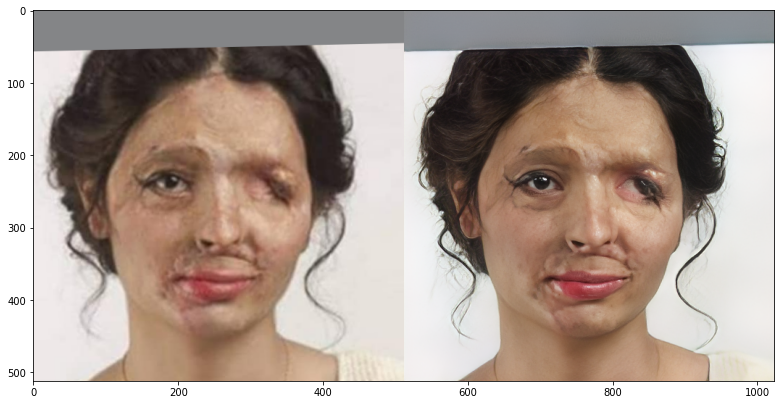

In [ ]:
# read images
img1 = imread("results/cmp/" + userfilename + "_00.png")
 

# show images
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2, 1, 1) 
ax1.imshow(img1)

In [ ]:
"results/cmp/" + userfilename + "_00.png"

'results/cmp/resh.jpg_00.png'

In [ ]:
userfilename

'resh.jpg'

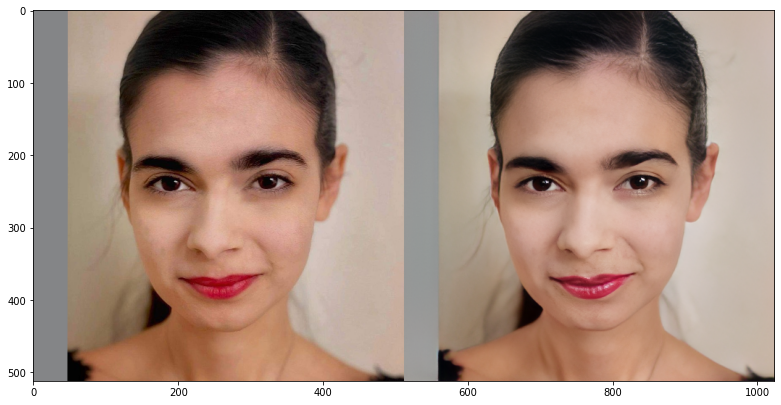

In [ ]:
# read images
img1 = imread("results/cmp/" + userfilename + "_00.png")
 

# show images
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2, 1, 1) 
ax1.imshow(img1)